<a href="https://colab.research.google.com/github/AllisonOge/predictive_modeling/blob/version2.0/predictive_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
%matplotlib inline
# increase the figure size
sns.set(rc={'figure.figsize': (15, 5)})
sns.set_style("whitegrid")

In [3]:
sensor_df = pd.read_csv("https://raw.githubusercontent.com/AllisonOge/predictive_modeling/main/data/sensor_ml.csv", index_col="id")
# sensor_df = pd.read_csv("sensor_ml.csv", index_col="id")

In [4]:
sensor_df

,chan_1,chan_2,chan_3,chan_4,created_at
id,,,,,
1,1,0,0,0,2022-11-15 16:14:18.829480
2,1,0,0,0,2022-11-15 16:14:18.914676
3,1,0,0,0,2022-11-15 16:14:18.983745
4,1,0,0,0,2022-11-15 16:14:19.059611
5,1,0,0,0,2022-11-15 16:14:19.134008
...,...,...,...,...,...
23566,1,1,1,1,2022-11-15 16:44:18.563776
23567,1,1,1,1,2022-11-15 16:44:18.693114
23568,1,1,1,1,2022-11-15 16:44:18.755782


In [5]:
sensor_df.groupby("created_at")["chan_1"].value_counts()

created_at                  chan_1
2022-11-15 16:14:18.829480  1         1
2022-11-15 16:14:18.914676  1         1
2022-11-15 16:14:18.983745  1         1
2022-11-15 16:14:19.059611  1         1
2022-11-15 16:14:19.134008  1         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_1, Length: 23570, dtype: int64

In [6]:
sensor_df.groupby("created_at")["chan_2"].value_counts()

created_at                  chan_2
2022-11-15 16:14:18.829480  0         1
2022-11-15 16:14:18.914676  0         1
2022-11-15 16:14:18.983745  0         1
2022-11-15 16:14:19.059611  0         1
2022-11-15 16:14:19.134008  0         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_2, Length: 23570, dtype: int64

In [7]:
sensor_df.groupby("created_at")["chan_3"].value_counts()

created_at                  chan_3
2022-11-15 16:14:18.829480  0         1
2022-11-15 16:14:18.914676  0         1
2022-11-15 16:14:18.983745  0         1
2022-11-15 16:14:19.059611  0         1
2022-11-15 16:14:19.134008  0         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_3, Length: 23570, dtype: int64

In [8]:
sensor_df.groupby("created_at")["chan_4"].value_counts()

created_at                  chan_4
2022-11-15 16:14:18.829480  0         1
2022-11-15 16:14:18.914676  0         1
2022-11-15 16:14:18.983745  0         1
2022-11-15 16:14:19.059611  0         1
2022-11-15 16:14:19.134008  0         1
                                     ..
2022-11-15 16:44:18.563776  1         1
2022-11-15 16:44:18.693114  1         1
2022-11-15 16:44:18.755782  1         1
2022-11-15 16:44:18.819509  1         1
2022-11-15 16:44:18.885257  1         1
Name: chan_4, Length: 23570, dtype: int64

In [9]:
sensor_copy_df = sensor_df
sensor_copy_df = sensor_copy_df.drop_duplicates(subset="created_at")
sensor_copy_df = sensor_copy_df.set_index("created_at")

In [10]:
sensor_copy_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-11-15 16:14:18.829480,1,0,0,0
2022-11-15 16:14:18.914676,1,0,0,0
2022-11-15 16:14:18.983745,1,0,0,0
2022-11-15 16:14:19.059611,1,0,0,0
2022-11-15 16:14:19.134008,1,0,0,0
...,...,...,...,...
2022-11-15 16:44:18.563776,1,1,1,1
2022-11-15 16:44:18.693114,1,1,1,1
2022-11-15 16:44:18.755782,1,1,1,1


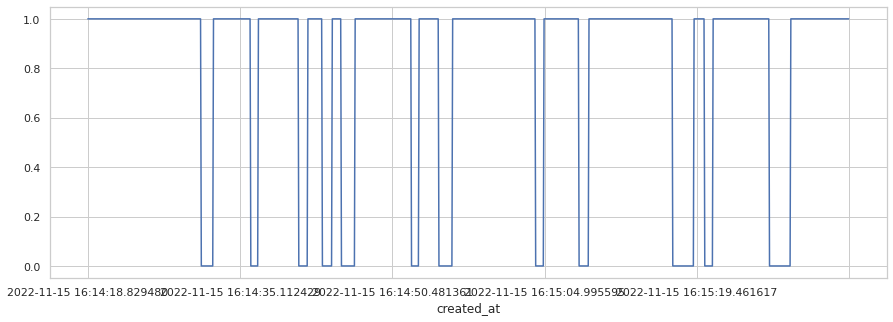

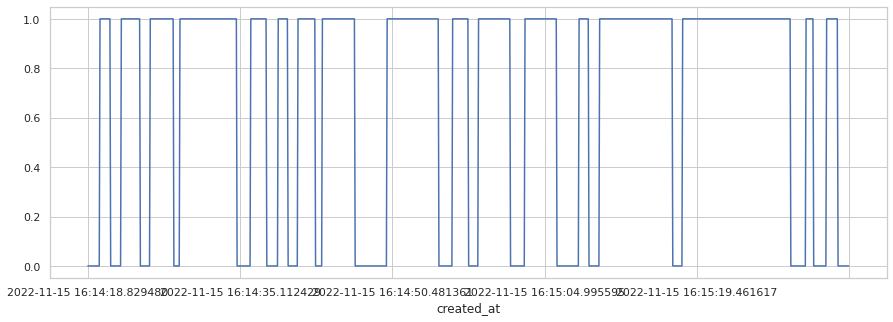

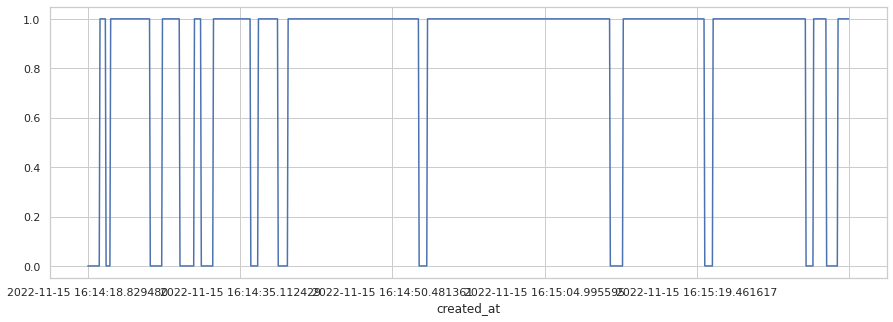

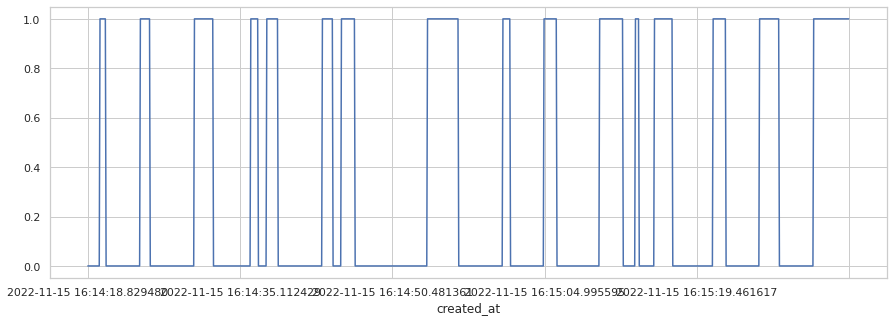

In [11]:
for col in sensor_copy_df.columns:
  sensor_copy_df[col][:1000].plot()
  plt.show()

## Hypothesis 🤔: Can my model predict the idle time for a channel?

## Data preparation 🍳

In [28]:
def start_and_idle_time(bit_sequence):
    bit_sequence = np.asarray(bit_sequence, dtype=np.int32)
    start_time = 0
    idle_time = 0
    idle_times = []
    for i, bit in enumerate(bit_sequence):
        if i > 0:
            if bit == 0 and bit_sequence[i-1] == 1:
                # 1,0
                start_time = i
                idle_time += 1
            elif bit == 0 and bit_sequence[i-1] == 0:
                # 0,0
                idle_time += 1
            elif bit == 1 and bit_sequence[i-1] == 0:
                # 0,1
                idle_times.append((start_time, idle_time))
                idle_time = 0
        else:
            if bit == 0:
                start_time = i
                idle_time += 1

        if i == len(bit_sequence)-1 and idle_time > 0:
            idle_times.append((start_time, idle_time))
        
        if len(idle_times) > 1:
          break

    return np.array(idle_times)

In [29]:
def get_idletimes_df(df):
  idle_times = []
  for i in range(df.shape[0]):
    idle_times.append([j[0][1] if len(j) > 0 and i+j[0][0] <= i else 0 
                       for j in  list(map(start_and_idle_time, df.to_numpy()[i:].transpose()))])
    
  return pd.DataFrame(data=idle_times, index=df.index, columns=df.columns)

In [30]:
idle_times_df = get_idletimes_df(sensor_copy_df)
idle_times_df

,chan_1,chan_2,chan_3,chan_4
created_at,,,,
2022-11-15 16:14:18.829480,0,16,16,16
2022-11-15 16:14:18.914676,0,15,15,15
2022-11-15 16:14:18.983745,0,14,14,14
2022-11-15 16:14:19.059611,0,13,13,13
2022-11-15 16:14:19.134008,0,12,12,12
...,...,...,...,...
2022-11-15 16:44:18.563776,0,0,0,0
2022-11-15 16:44:18.693114,0,0,0,0
2022-11-15 16:44:18.755782,0,0,0,0


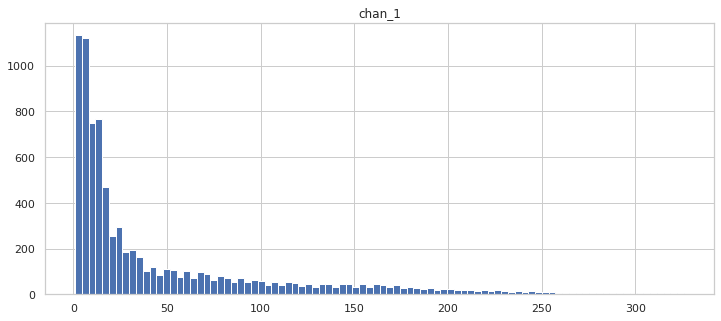

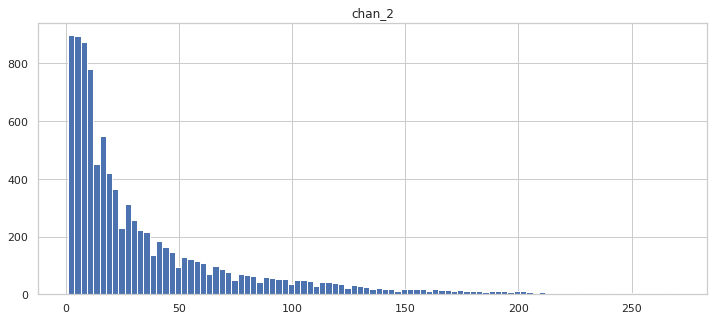

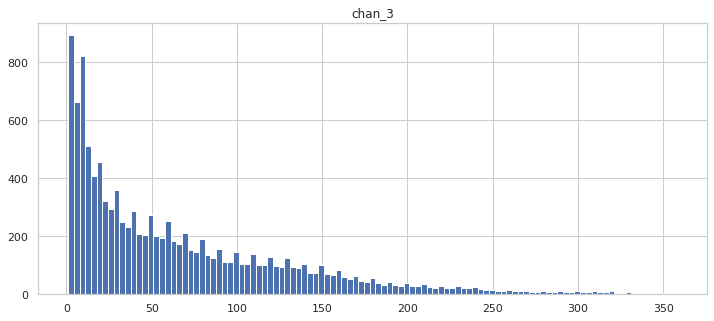

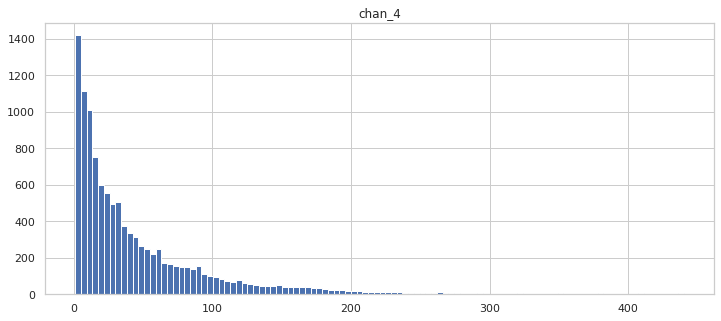

In [31]:
for col in idle_times_df.columns:
  plt.figure(figsize=(12, 5))
  data = idle_times_df[idle_times_df[col] > 0][col]
  plt.hist(data, bins=int(np.sqrt(len(data))))
  plt.title(col)
  plt.show()

In [32]:
def df_to_X_y2(df1, df2, window_size=10):
  X = []
  y = []
  for i in range(df1.shape[0]-window_size):
    X.append([r for r in df1.to_numpy()[i:i+window_size]])
    y.append(df2.to_numpy()[i+window_size])
  return np.array(X), np.array(y)

In [51]:
scaler = MinMaxScaler()
idle_times_transformed_df = pd.DataFrame(scaler.fit_transform((idle_times_df)), index=idle_times_df.index, columns=idle_times_df.columns)

In [98]:
X2, y2 = df_to_X_y2(sensor_copy_df, idle_times_transformed_df, window_size=25)
X2.shape, y2.shape

((23545, 25, 4), (23545, 4))

In [99]:
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.2)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_temp, y2_temp, test_size=0.5)
X2_train.shape, X2_test.shape, X2_val.shape

((18836, 25, 4), (2354, 25, 4), (2355, 25, 4))

## Build the model 🧠

In [100]:
def build_model2(input_shape):
  return tf.keras.models.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.LSTM(45, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(45, return_sequences=True),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.LSTM(45),
      tf.keras.layers.Dense(45, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu")
  ])

In [101]:
model2 = build_model2((X2.shape[1], X2.shape[2]))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 25, 45)            9000      
                                                                 
 dropout_5 (Dropout)         (None, 25, 45)            0         
                                                                 
 lstm_15 (LSTM)              (None, 25, 45)            16380     
                                                                 
 dropout_6 (Dropout)         (None, 25, 45)            0         
                                                                 
 lstm_16 (LSTM)              (None, 45)                16380     
                                                                 
 dense_10 (Dense)            (None, 45)                2070      
                                                                 
 dense_11 (Dense)            (None, 4)                

In [102]:
model2.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [103]:
callback = tf.keras.callbacks.ModelCheckpoint("ckpt", verbose=1, save_best_only=True, monitor="val_loss", mode="min")

In [104]:
history2 = model2.fit(X2_train, y2_train, batch_size=32, epochs=30, callbacks=[callback], validation_data=(X2_val, y2_val))

Epoch 1/30
589/589 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.6292
Epoch 1: val_loss improved from inf to 0.01175, saving model to ckpt


589/589 [==============================] - 48s 71ms/step - loss: 0.0128 - accuracy: 0.6292 - val_loss: 0.0118 - val_accuracy: 0.6505
Epoch 2/30
588/589 [============================>.] - ETA: 0s - loss: 0.0120 - accuracy: 0.6717
Epoch 2: val_loss improved from 0.01175 to 0.01063, saving model to ckpt


589/589 [==============================] - 39s 66ms/step - loss: 0.0120 - accuracy: 0.6717 - val_loss: 0.0106 - val_accuracy: 0.6845
Epoch 3/30
588/589 [============================>.] - ETA: 0s - loss: 0.0114 - accuracy: 0.7010
Epoch 3: val_loss improved from 0.01063 to 0.01052, saving model to ckpt


589/589 [==============================] - 39s 66ms/step - loss: 0.0114 - accuracy: 0.7009 - val_loss: 0.0105 - val_accuracy: 0.7070
Epoch 4/30
588/589 [============================>.] - ETA: 0s - loss: 0.0112 - accuracy: 0.7131
Epoch 4: val_loss improved from 0.01052 to 0.01024, saving model to ckpt


589/589 [==============================] - 38s 65ms/step - loss: 0.0112 - accuracy: 0.7132 - val_loss: 0.0102 - val_accuracy: 0.7397
Epoch 5/30
589/589 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.7264
Epoch 5: val_loss did not improve from 0.01024
589/589 [==============================] - 25s 42ms/step - loss: 0.0109 - accuracy: 0.7264 - val_loss: 0.0104 - val_accuracy: 0.7168
Epoch 6/30
589/589 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.7359
Epoch 6: val_loss did not improve from 0.01024
589/589 [==============================] - 24s 41ms/step - loss: 0.0107 - accuracy: 0.7359 - val_loss: 0.0103 - val_accuracy: 0.7397
Epoch 7/30
588/589 [============================>.] - ETA: 0s - loss: 0.0106 - accuracy: 0.7465
Epoch 7: val_loss improved from 0.01024 to 0.00999, saving model to ckpt


589/589 [==============================] - 40s 68ms/step - loss: 0.0106 - accuracy: 0.7466 - val_loss: 0.0100 - val_accuracy: 0.7648
Epoch 8/30
589/589 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.7597
Epoch 8: val_loss improved from 0.00999 to 0.00963, saving model to ckpt


589/589 [==============================] - 40s 68ms/step - loss: 0.0104 - accuracy: 0.7597 - val_loss: 0.0096 - val_accuracy: 0.7724
Epoch 9/30
589/589 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.7670
Epoch 9: val_loss improved from 0.00963 to 0.00950, saving model to ckpt


589/589 [==============================] - 39s 66ms/step - loss: 0.0103 - accuracy: 0.7670 - val_loss: 0.0095 - val_accuracy: 0.7758
Epoch 10/30
588/589 [============================>.] - ETA: 0s - loss: 0.0102 - accuracy: 0.7690
Epoch 10: val_loss did not improve from 0.00950
589/589 [==============================] - 24s 41ms/step - loss: 0.0102 - accuracy: 0.7690 - val_loss: 0.0095 - val_accuracy: 0.7796
Epoch 11/30
588/589 [============================>.] - ETA: 0s - loss: 0.0100 - accuracy: 0.7719
Epoch 11: val_loss improved from 0.00950 to 0.00944, saving model to ckpt


589/589 [==============================] - 39s 66ms/step - loss: 0.0100 - accuracy: 0.7719 - val_loss: 0.0094 - val_accuracy: 0.7665
Epoch 12/30
589/589 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.7780
Epoch 12: val_loss improved from 0.00944 to 0.00935, saving model to ckpt


589/589 [==============================] - 38s 65ms/step - loss: 0.0098 - accuracy: 0.7780 - val_loss: 0.0094 - val_accuracy: 0.7788
Epoch 13/30
589/589 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.7824
Epoch 13: val_loss did not improve from 0.00935
589/589 [==============================] - 24s 41ms/step - loss: 0.0096 - accuracy: 0.7824 - val_loss: 0.0096 - val_accuracy: 0.7860
Epoch 14/30
588/589 [============================>.] - ETA: 0s - loss: 0.0095 - accuracy: 0.7858
Epoch 14: val_loss improved from 0.00935 to 0.00909, saving model to ckpt


589/589 [==============================] - 39s 67ms/step - loss: 0.0095 - accuracy: 0.7857 - val_loss: 0.0091 - val_accuracy: 0.7775
Epoch 15/30
589/589 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.7901
Epoch 15: val_loss improved from 0.00909 to 0.00885, saving model to ckpt


589/589 [==============================] - 40s 69ms/step - loss: 0.0093 - accuracy: 0.7901 - val_loss: 0.0088 - val_accuracy: 0.8025
Epoch 16/30
589/589 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 0.7919
Epoch 16: val_loss improved from 0.00885 to 0.00871, saving model to ckpt


589/589 [==============================] - 39s 66ms/step - loss: 0.0092 - accuracy: 0.7919 - val_loss: 0.0087 - val_accuracy: 0.8013
Epoch 17/30
588/589 [============================>.] - ETA: 0s - loss: 0.0090 - accuracy: 0.7958
Epoch 17: val_loss improved from 0.00871 to 0.00852, saving model to ckpt


589/589 [==============================] - 39s 66ms/step - loss: 0.0090 - accuracy: 0.7959 - val_loss: 0.0085 - val_accuracy: 0.8017
Epoch 18/30
589/589 [==============================] - ETA: 0s - loss: 0.0089 - accuracy: 0.7945
Epoch 18: val_loss did not improve from 0.00852
589/589 [==============================] - 25s 43ms/step - loss: 0.0089 - accuracy: 0.7945 - val_loss: 0.0086 - val_accuracy: 0.8008
Epoch 19/30
589/589 [==============================] - ETA: 0s - loss: 0.0088 - accuracy: 0.7989
Epoch 19: val_loss improved from 0.00852 to 0.00828, saving model to ckpt


589/589 [==============================] - 39s 65ms/step - loss: 0.0088 - accuracy: 0.7989 - val_loss: 0.0083 - val_accuracy: 0.8038
Epoch 20/30
588/589 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.8004
Epoch 20: val_loss improved from 0.00828 to 0.00820, saving model to ckpt


589/589 [==============================] - 39s 66ms/step - loss: 0.0087 - accuracy: 0.8003 - val_loss: 0.0082 - val_accuracy: 0.8000
Epoch 21/30
589/589 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.7982
Epoch 21: val_loss improved from 0.00820 to 0.00816, saving model to ckpt


589/589 [==============================] - 38s 65ms/step - loss: 0.0086 - accuracy: 0.7982 - val_loss: 0.0082 - val_accuracy: 0.7970
Epoch 22/30
588/589 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.7976
Epoch 22: val_loss improved from 0.00816 to 0.00793, saving model to ckpt


589/589 [==============================] - 40s 69ms/step - loss: 0.0085 - accuracy: 0.7977 - val_loss: 0.0079 - val_accuracy: 0.8115
Epoch 23/30
588/589 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.8060
Epoch 23: val_loss improved from 0.00793 to 0.00791, saving model to ckpt


589/589 [==============================] - 39s 66ms/step - loss: 0.0084 - accuracy: 0.8061 - val_loss: 0.0079 - val_accuracy: 0.8047
Epoch 24/30
589/589 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.8060
Epoch 24: val_loss improved from 0.00791 to 0.00790, saving model to ckpt


589/589 [==============================] - 38s 65ms/step - loss: 0.0083 - accuracy: 0.8060 - val_loss: 0.0079 - val_accuracy: 0.8110
Epoch 25/30
588/589 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.8055
Epoch 25: val_loss improved from 0.00790 to 0.00769, saving model to ckpt


589/589 [==============================] - 38s 65ms/step - loss: 0.0081 - accuracy: 0.8055 - val_loss: 0.0077 - val_accuracy: 0.8110
Epoch 26/30
588/589 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.8053
Epoch 26: val_loss did not improve from 0.00769
589/589 [==============================] - 24s 42ms/step - loss: 0.0081 - accuracy: 0.8053 - val_loss: 0.0077 - val_accuracy: 0.8085
Epoch 27/30
588/589 [============================>.] - ETA: 0s - loss: 0.0080 - accuracy: 0.8052
Epoch 27: val_loss did not improve from 0.00769
589/589 [==============================] - 24s 42ms/step - loss: 0.0080 - accuracy: 0.8051 - val_loss: 0.0078 - val_accuracy: 0.8030
Epoch 28/30
588/589 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.8089
Epoch 28: val_loss improved from 0.00769 to 0.00749, saving model to ckpt


589/589 [==============================] - 39s 66ms/step - loss: 0.0079 - accuracy: 0.8090 - val_loss: 0.0075 - val_accuracy: 0.8170
Epoch 29/30
589/589 [==============================] - ETA: 0s - loss: 0.0078 - accuracy: 0.8087
Epoch 29: val_loss improved from 0.00749 to 0.00736, saving model to ckpt


589/589 [==============================] - 39s 66ms/step - loss: 0.0078 - accuracy: 0.8087 - val_loss: 0.0074 - val_accuracy: 0.8200
Epoch 30/30
588/589 [============================>.] - ETA: 0s - loss: 0.0077 - accuracy: 0.8107
Epoch 30: val_loss did not improve from 0.00736
589/589 [==============================] - 27s 46ms/step - loss: 0.0077 - accuracy: 0.8108 - val_loss: 0.0074 - val_accuracy: 0.8115


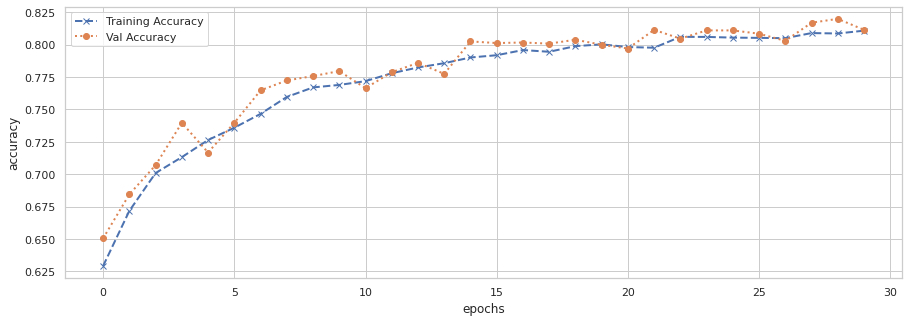

In [105]:
plt.plot(history2.history["accuracy"], label="Training Accuracy", marker="x", ls="--", linewidth=2)
plt.plot(history2.history["val_accuracy"], label="Val Accuracy", marker="o", ls=":", linewidth=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.savefig("training.png")

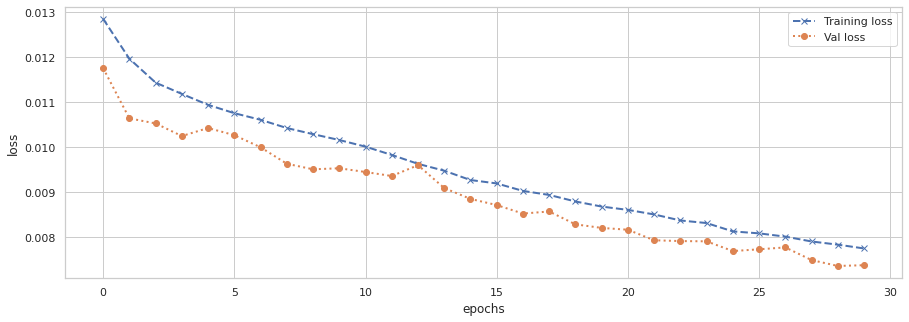

In [106]:
plt.plot(history2.history["loss"], label="Training loss", marker="x", ls="--", linewidth=2)
plt.plot(history2.history["val_loss"], label="Val loss", marker="o", ls=":", linewidth=2)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.savefig("loss.png")

In [107]:
model2.load_weights("ckpt")
test_preds = model2.predict(X2_test)
test_preds

74/74 [==============================] - 2s 12ms/step


array([[0.32123858, 0.26684535, 0.        , 0.        ],
       [0.05078916, 0.        , 0.35888895, 0.08525202],
       [0.        , 0.        , 0.24584056, 0.08839525],
       ...,
       [0.24737158, 0.15827507, 0.11873254, 0.        ],
       [0.        , 0.        , 0.10882099, 0.        ],
       [0.        , 0.        , 0.        , 0.13844699]], dtype=float32)

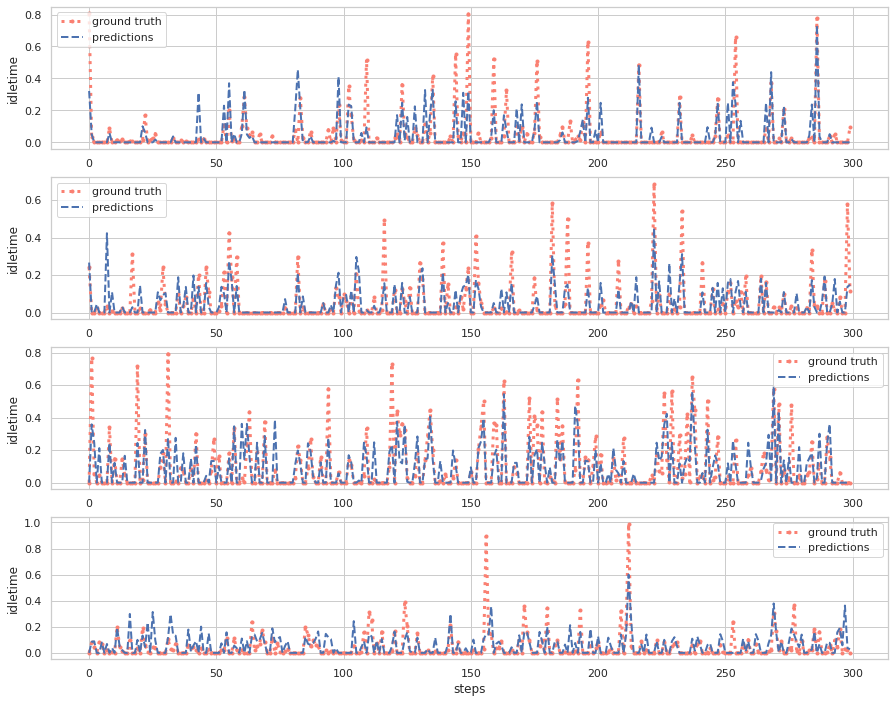

In [108]:
nchannels = y2.shape[1]
fig, ax = plt.subplots(nrows=nchannels, ncols=1, figsize=(15, 12))
for i in range(nchannels):
  ax[i].plot(y2_test[:300, i], label="ground truth", marker=".", ls=":", linewidth=3, color="salmon")
  ax[i].plot(test_preds[:300, i], label="predictions", ls="--", linewidth=2)
  ax[i].legend()
  ax[i].set_ylabel("idletime")
  if i == nchannels-1:
    ax[i].set_xlabel("steps")
plt.savefig("predictions.png")

### Save the model 💾

In [109]:
def save_model(model, filename="model.tflite"):
  # convert the keras model to tflite
  converter = tf.lite.TFLiteConverter.from_keras_model(model)
  converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
  ]

  tflite_model = converter.convert()

  # save the tflite model
  with open(filename, "wb") as f:
    f.write(tflite_model)

In [112]:
save_model(model2, "model.tflite")